In [1]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns

In [2]:
api_key = ''
channel_ids = ['UCPxMZIFE856tbTfdkdjzTSQ',
               'UC6WzPg6yxF9dQx2_O6R4lww',
               'UCsDTy8jvHcwMvSZf_JGi-FA',
               'UCRzYN32xtBf3Yxsx5BvJWJw',
               'UCzwCEE_PchiBULMnAJqhGVg']

youtube = build('youtube', 'v3', developerKey=api_key)

# Function to get channel statistics

In [4]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
                part = 'snippet, contentDetails, statistics',
                id = ','.join(channel_ids))
    response = request.execute()

    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                    Subscribers = response['items'][i]['statistics']['subscriberCount'],
                    Views = response['items'][i]['statistics']['viewCount'],
                    Total_videos = response['items'][i]['statistics']['videoCount'],
                    playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)
    return all_data

In [5]:
channel_statistics = get_channel_stats(youtube, channel_ids)

In [6]:
channel_data = pd.DataFrame(channel_statistics)

In [7]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,BeerBiceps,8290000,2304562900,3033,UUPxMZIFE856tbTfdkdjzTSQ
1,Nitish Rajput,6420000,637074870,109,UU6WzPg6yxF9dQx2_O6R4lww
2,Raj Shamani,4830000,1166617140,1646,UUzwCEE_PchiBULMnAJqhGVg
3,Abhi and Niyu,6340000,1021550103,917,UUsDTy8jvHcwMvSZf_JGi-FA
4,warikoo,5920000,1307654003,1722,UURzYN32xtBf3Yxsx5BvJWJw


In [8]:
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])
channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
playlist_id     object
dtype: object

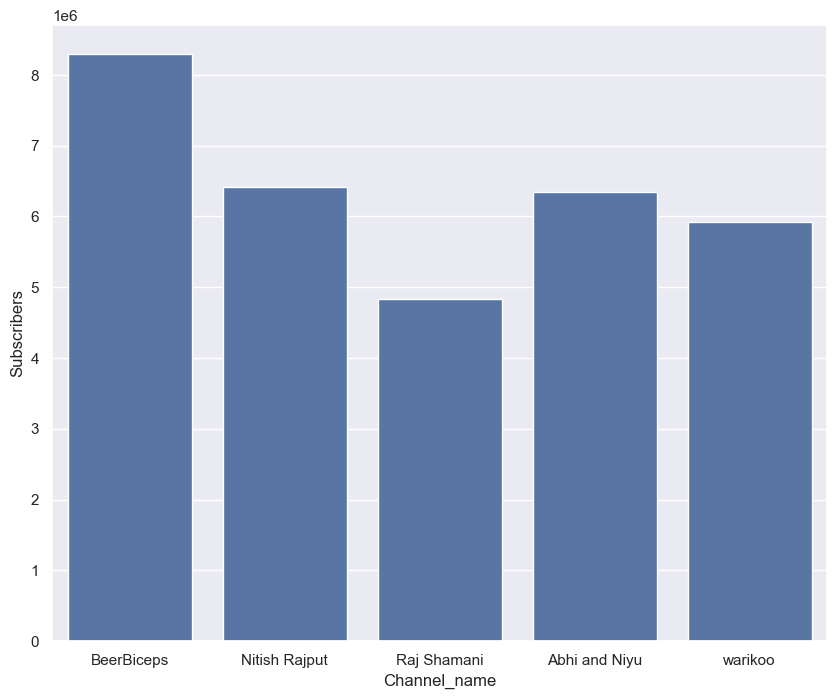

In [9]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot(x = 'Channel_name', y = 'Subscribers', data = channel_data)

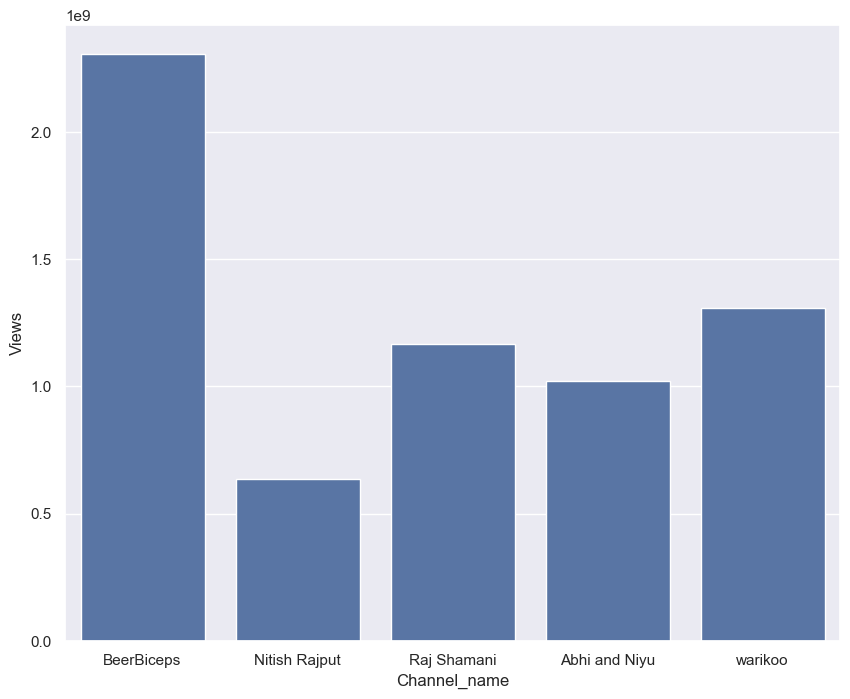

In [10]:
ax = sns.barplot(x = 'Channel_name', y = 'Views', data = channel_data)

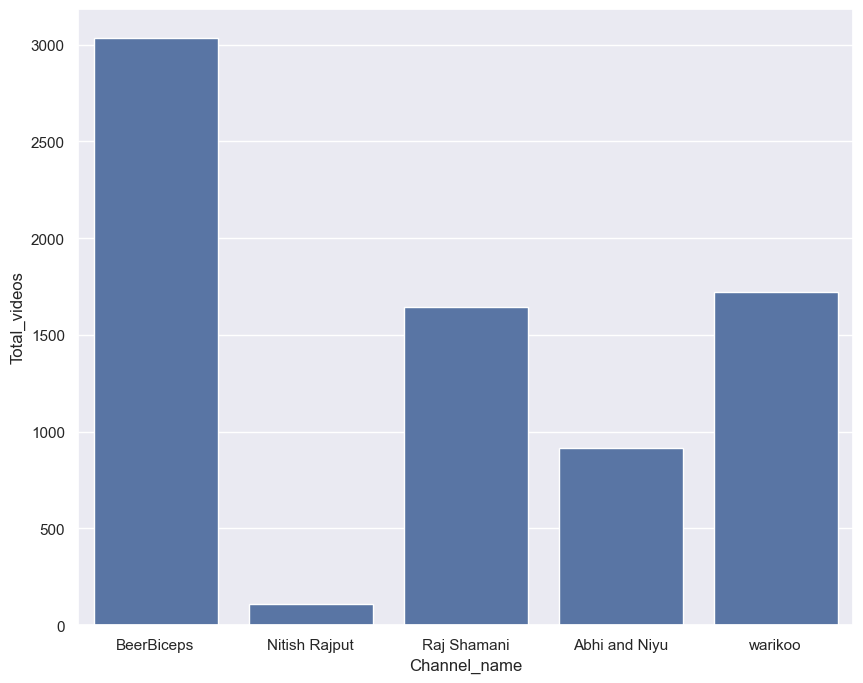

In [11]:
ax = sns.barplot(x = 'Channel_name', y = 'Total_videos', data = channel_data)

## Function to get video ids

In [13]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,BeerBiceps,8290000,2304562900,3033,UUPxMZIFE856tbTfdkdjzTSQ
1,Nitish Rajput,6420000,637074870,109,UU6WzPg6yxF9dQx2_O6R4lww
2,Raj Shamani,4830000,1166617140,1646,UUzwCEE_PchiBULMnAJqhGVg
3,Abhi and Niyu,6340000,1021550103,917,UUsDTy8jvHcwMvSZf_JGi-FA
4,warikoo,5920000,1307654003,1722,UURzYN32xtBf3Yxsx5BvJWJw


In [14]:
playlist_id = channel_data.loc[channel_data['Channel_name']=='BeerBiceps', 'playlist_id'].iloc[0]

In [15]:
def get_video_ids(youtube, playlist_id):
    request = youtube.playlistItems().list(
                part = 'contentDetails',
                playlistId = playlist_id,
                maxResults = 50)
    response = request.execute()

    video_ids = []

    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')
    more_pages = True

    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                        part = 'contentDetails',
                        playlistId = playlist_id,
                        maxResults = 50,
                        pageToken = next_page_token)
            response = request.execute()

            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            next_page_token = response.get('nextPageToken')
    
    return video_ids

In [16]:
videos_ids = get_video_ids(youtube, playlist_id)

In [17]:
videos_ids

['I0ze08NJoA8',
 '5-cG9j81HGo',
 'gh8lBtJeXGE',
 'U1RjMY-vPAI',
 'yLYR0DtamuU',
 'H2yCIyJxyZc',
 'MBODJ3_GxtM',
 '0IvicK2AqJs',
 'Ri8UHbU7XdI',
 '62n1C-1ZjbU',
 'x4kjFQpGuDk',
 'sQUzuHeTY08',
 'BDZcXYrIanI',
 'jxtCP7G3mV0',
 '40barmHmXm4',
 'f0-AG0D9E6M',
 'pugEp1cpXgo',
 'zmsrs4Ici7A',
 'AnBMNz7gotM',
 'KB8WtoFVXO8',
 'lrm-kxsDO2w',
 '7aH6p3BlIVs',
 'utCFwK7M8ck',
 'jvmHDais7ac',
 'SWMIsoIeLEo',
 '-lD3suzg1Cc',
 'YjRRLgtSgLU',
 'RXz7Oq2FCx8',
 'RiHi4solYHE',
 'FB9ZxWEdOeg',
 '1sq4UxZ-rAM',
 'TPMpChT80qM',
 'sbOr9W7_dwg',
 '1ZujG0eUmgQ',
 'fy_7s601xZE',
 'Ie_0kY1HTOQ',
 'qiBefGbxVhk',
 'Q-CkUzPYFLc',
 'G9AskTfFt_Y',
 'YTBYUYuT94Q',
 '94LqMNSHTSQ',
 '63-m5pmNy38',
 'vKOzvf_LMXY',
 'S09bfkJwltY',
 '0EGZpIIlD0k',
 'y6AlvUSMpho',
 'r7yr-z4-1Hk',
 'cYe4f9sOOKA',
 'CI2Q43ElegA',
 'NIhzpztuEL8',
 '8d4dn8GLMGo',
 '60JjQaQt0uY',
 'ET62eP-Dyxo',
 'xmXfmON22ZQ',
 'sNLfYT-31jA',
 'VA5vnMt45oE',
 'dtMe-3TRUdo',
 'iW2P7gBgiQE',
 'w51d3f01idA',
 'Umtr9UjiklQ',
 'O9o33q86C7M',
 'lNIIPAhXD0E',
 'wvHTkO

## Function to get video details

In [19]:
def get_video_details(youtube, videos_ids):

    all_video_stats = []
    for i in range(0, len(videos_ids), 50):
        request = youtube.videos().list(
                    part = 'snippet,statistics',
                    id = ','.join(videos_ids)[i:i+50])
        response = request.execute()

        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                               Published_date = video['snippet']['publishedAt'],
                               Views = video['statistics']['viewCount'],
                               Likes = video['statistics']['likeCount'],
                               Favourites = video['statistics']['favoriteCount'],
                               Comments = video['statistics']['commentCount'])
            all_video_stats.append(video_stats)
    
    return all_video_stats

In [20]:
video_details = get_video_details(youtube, videos_ids)

In [21]:
video_data = pd.DataFrame(video_details)

In [22]:
video_data['Published_date'] = pd.to_datetime(video_data['Published_date']).dt.date
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data['Likes'] = pd.to_numeric(video_data['Likes'])
video_data['Favourites'] = pd.to_numeric(video_data['Favourites'])
video_data['Comments'] = pd.to_numeric(video_data['Comments'])
video_data

,Title,Published_date,Views,Likes,Favourites,Comments
0,Sanjeev Sanyal Explains The CORRECT Way Of Tax...,2025-02-01,902,193,0,1
1,ISRO Chairman Dr. S. Somanath OPENS UP About S...,2025-02-01,920,643,0,4
2,Dr. S. Somanath OPENS UP About ISRO's Mindset ...,2025-02-01,5719,694,0,4
3,Why Did Ravan Go On A Retreat? ft. Yashodeep D...,2025-01-31,23335,1546,0,11
4,MUST-VISIT Holy Places In Sri Lanka - Yashodee...,2025-01-31,13898,1015,0,6
...,...,...,...,...,...,...
199,What Phone Does @Mrwhosetheboss Use? #shorts,2024-12-24,1968228,124414,0,554
200,What Is The Most Used App Of @Mrwhosetheboss? ...,2024-12-24,25757,916,0,4
201,@Mrwhosetheboss Talks About Dealing With Burno...,2024-12-24,11516,498,0,4
202,What Is The END GOAL Of @Mrwhosetheboss? #shorts,2024-12-24,17714,649,0,2


In [23]:
top10_videos = video_data.sort_values(by='Views', ascending = False).head(10)

In [24]:
top10_videos

,Title,Published_date,Views,Likes,Favourites,Comments
37,Which Country Has The Most Beautiful Girls In ...,2025-01-23,3117490,141471,0,945
199,What Phone Does @Mrwhosetheboss Use? #shorts,2024-12-24,1968228,124414,0,554
35,EXCLUSIVE Vlog - Anant Ambani's Vantara - Anim...,2025-01-24,1157467,40395,0,1273
78,Rajarshi Nandy OPENS UP About The Sadhus In Ku...,2025-01-14,839122,38327,0,56
124,Who Is Your Favourite? Cristiano Or Messi? ft....,2025-01-04,713269,41614,0,1330
91,The Majestic Appearance Of Shri Ram & Laxman -...,2025-01-11,594124,47823,0,365
66,Does Europe Have A Broken Tradition? ft. Peter...,2025-01-16,584073,20525,0,245
155,"Doctor To Billionaires & Celebrity, Dr. Chiti ...",2025-01-01,503792,10694,0,666
29,Yuvraj Srivastava REVEALS The Story Of A 1000-...,2025-01-26,503112,30336,0,581
160,"Walking into 2025 with gratitude, growth, and ...",2024-12-30,440346,20129,0,96


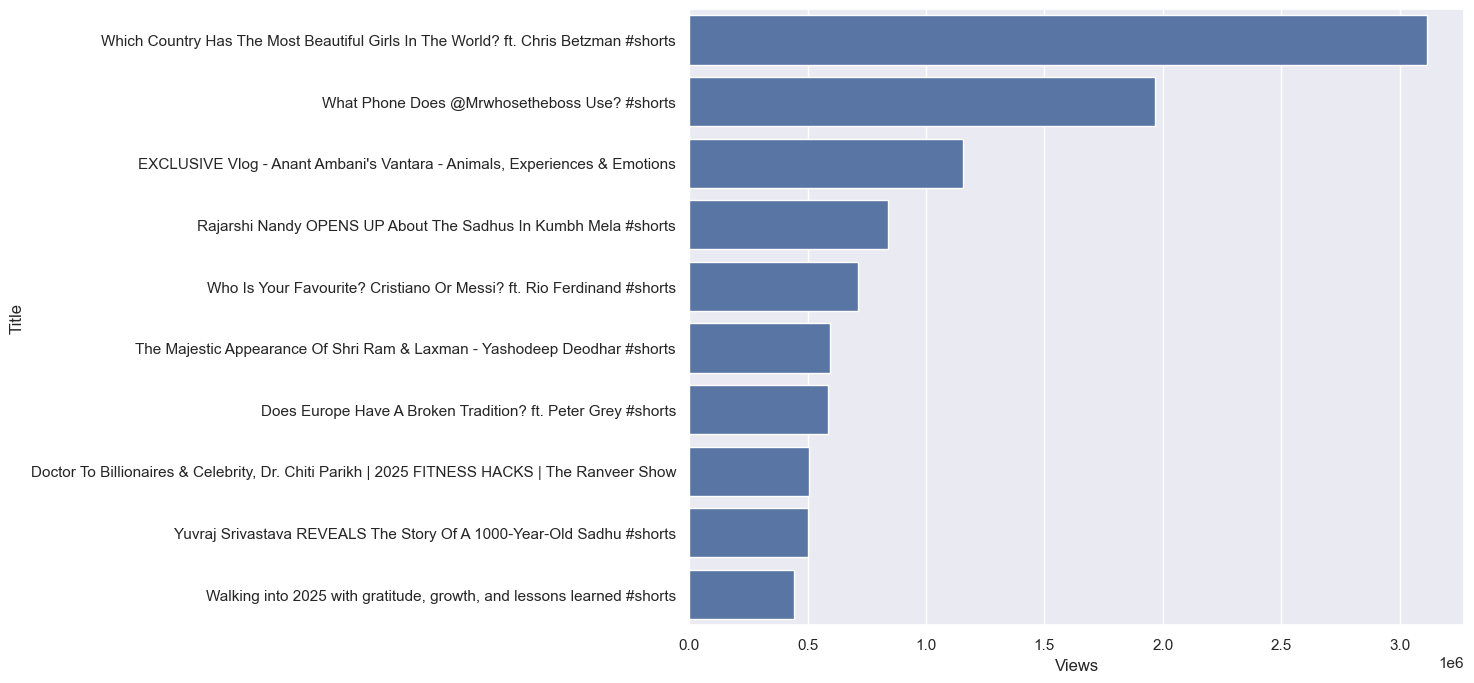

In [25]:
ax1 = sns.barplot(x = 'Views', y = 'Title', data = top10_videos)

In [26]:
video_data['Month'] = pd.to_datetime(video_data['Published_date']).dt.strftime('%b')

In [27]:
video_data

,Title,Published_date,Views,Likes,Favourites,Comments,Month
0,Sanjeev Sanyal Explains The CORRECT Way Of Tax...,2025-02-01,902,193,0,1,Feb
1,ISRO Chairman Dr. S. Somanath OPENS UP About S...,2025-02-01,920,643,0,4,Feb
2,Dr. S. Somanath OPENS UP About ISRO's Mindset ...,2025-02-01,5719,694,0,4,Feb
3,Why Did Ravan Go On A Retreat? ft. Yashodeep D...,2025-01-31,23335,1546,0,11,Jan
4,MUST-VISIT Holy Places In Sri Lanka - Yashodee...,2025-01-31,13898,1015,0,6,Jan
...,...,...,...,...,...,...,...
199,What Phone Does @Mrwhosetheboss Use? #shorts,2024-12-24,1968228,124414,0,554,Dec
200,What Is The Most Used App Of @Mrwhosetheboss? ...,2024-12-24,25757,916,0,4,Dec
201,@Mrwhosetheboss Talks About Dealing With Burno...,2024-12-24,11516,498,0,4,Dec
202,What Is The END GOAL Of @Mrwhosetheboss? #shorts,2024-12-24,17714,649,0,2,Dec


In [28]:
videos_per_month = video_data.groupby('Month', as_index = False).size()

In [29]:
videos_per_month

,Month,size
0,Dec,48
1,Feb,3
2,Jan,153


In [30]:
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [31]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'], categories = sort_order, ordered = True)

In [32]:
videos_per_month = videos_per_month.sort_index()

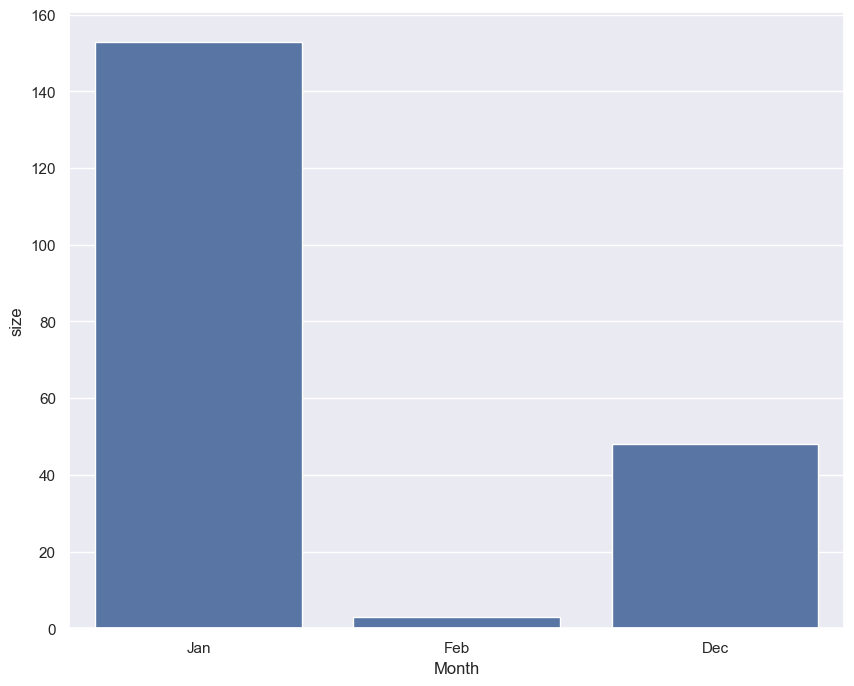

In [33]:
ax2 = sns.barplot(x='Month', y='size', data=videos_per_month)

In [34]:
video_data.to_csv('BeerBiceps_VideoDetails.csv')